# SOLAR POWER GENERATION

**Objective**

The variable to be predicted is continuous (energy production). Therefore, this is an Regression project. The primary goal is to model energy production as a function of environmental variables

**Data Set Description**

The file solarpowergeneration.csv contains the data for this example. Here, the number of variables (columns) is 10, and the number of instances (rows) is 2920.

We have the following variables for this analysis:

1. distance_to_solar_noon, in radians.
2. temperature, daily average temperature, in degrees Celsius.
3. wind_direction, daily average wind direction, in degrees (0-360).
4. wind_speed, daily average wind speed, in meters per second.
5. sky_cover, on a five-step scale from 0 to 4, with 0 completely clear and 4 wholly covered.
6. visibility, in kilometers.
7. humidity, in percentage.
8. average_wind_speed, average wind speed during the 3 hours de measure was taken in meters per second.
9. average_pressure, average barometric pressure during the 3 hours the measure was taken in, in mercury inches.
10. power_generated(Target), in Jules for each 3 hours

# Exploratory Data Analysis (EDA)¶

Load the Data and Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the dataset
data = pd.read_csv("solarpowergeneration.csv")

In [4]:
data

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                          8.0   
1             0        10.0        77                          5.0   
2             0        10.0        70                          0.0   
3             0        10.0        33                          0.0   
4             0        10.0        21                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82                0  
1                         29.85                0  
2                         29.89             5418  
3                         29.91            25477  
4                         29.89            30069  
...                         ...              ...  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0  

[2920 rows x 10 columns]

# Perform EDA

In [3]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB
None


In [4]:
data.describe()

distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2919.000000   
mean      1.987671     9.557705    73.513699                    10.129154   
std       1.411978     1.383884    15.077139                     7.261547   
min       0.000000     0.000000    14.000000                     0.000000   
25%       1.000000    10.000000    65.000000                     5.000000   
50%       2.000000    10.000000    77.000000                     9.000000   
75%       3.000000    10.000000    84.000000                    15.000000   
max       4.000000    10.000000   100.000000                    40.000000   

       average-pressure-(period)  power-generated  
count                2920.000000      2920.000000  
mean                   30.017760      6979.846233  
std                     0.142006     10312.336413  
min                    29.480000         0.000000  
25%                    29.920000         0.000000  
50%                    30.000000       404.000000  
75%                    30.110000     12723.500000  
max                    30.530000     36580.000000

In [5]:
# Display the first few rows of the dataset
data.head()

distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average-pressure-(period)  power-generated  
0                      29.82                0  
1                      29.85                0  
2                      29.89             5418  
3                      29.91            25477  
4                      29.89            30069

# Check for Null Values and Duplicate Values

In [6]:
# Check for null values
data.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [7]:
# Remove null values
data.dropna(inplace=True)

In [8]:
# Check for duplicate values
data.duplicated().sum()

0

No Null Values and Duplicate Values

# Check for Outliers

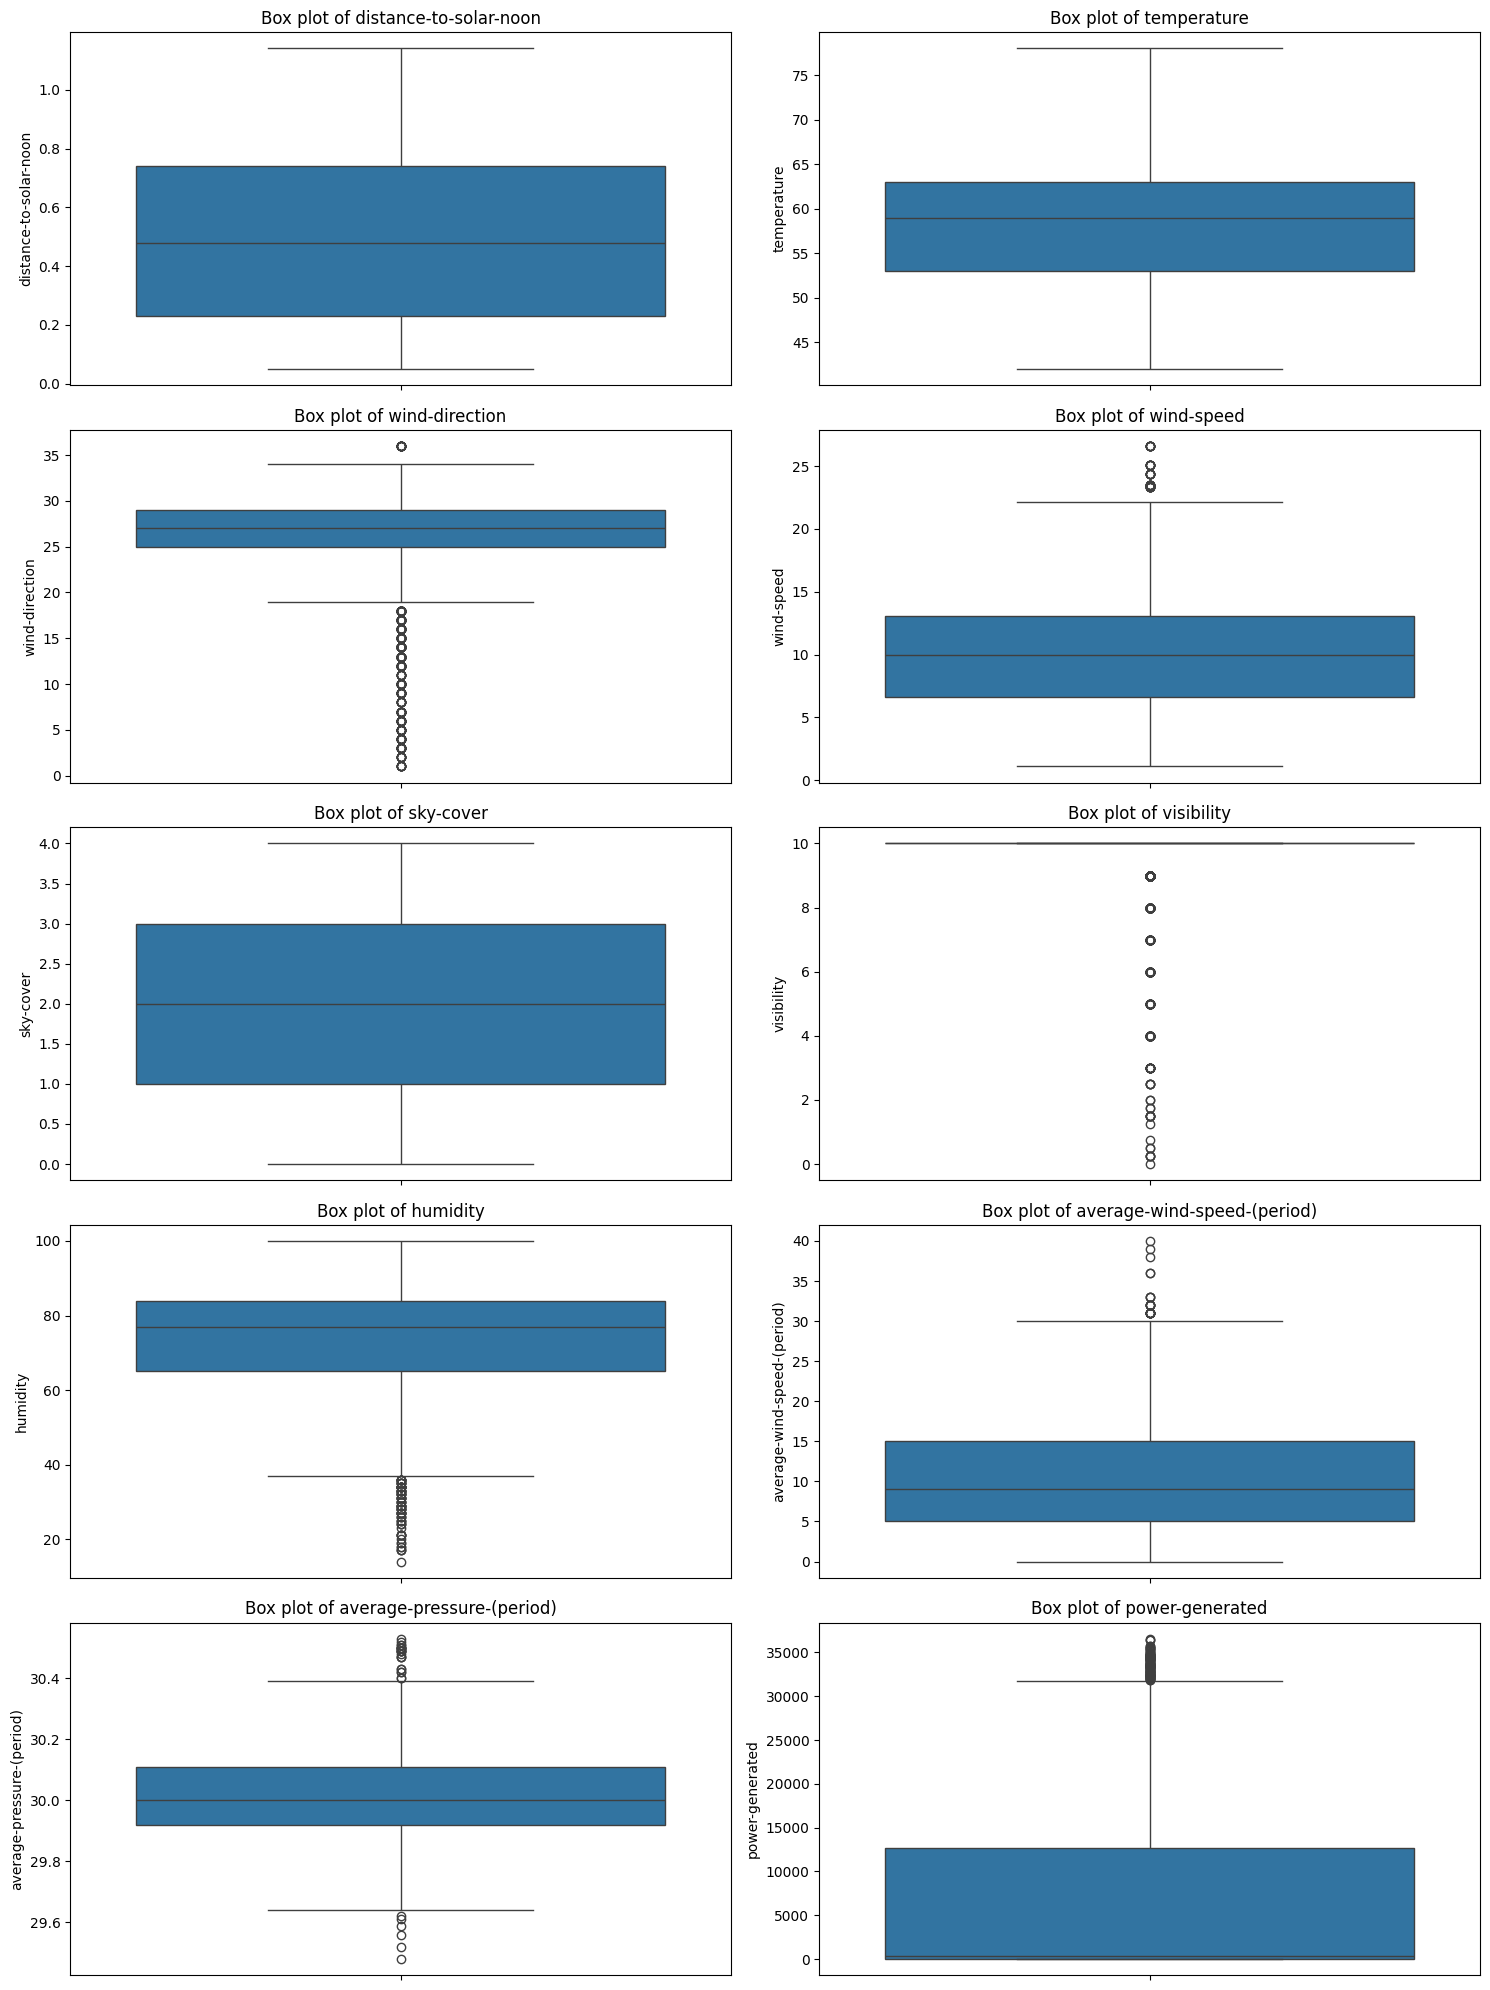

In [9]:
# Visualize the outliers using box plots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for i, column in enumerate(data.columns):
    sns.boxplot(y=data[column], ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

# Observations and Insights

# Outlier Plot

# Observations:

1. Outliers are present in several features, including temperature, wind-speed, visibility, humidity, average-wind-speed-(period), average-pressure-(period), and power-generated.

2. These outliers could impact model performance if not handled appropriately.

Insights:

1. It might be necessary to handle outliers through methods like capping, transformation, or removing them to improve model robustness.

2. Outliers in features like wind-speed and temperature could indicate extreme weather conditions, which might be important for modeling energy production.

# Visualize the Dataset

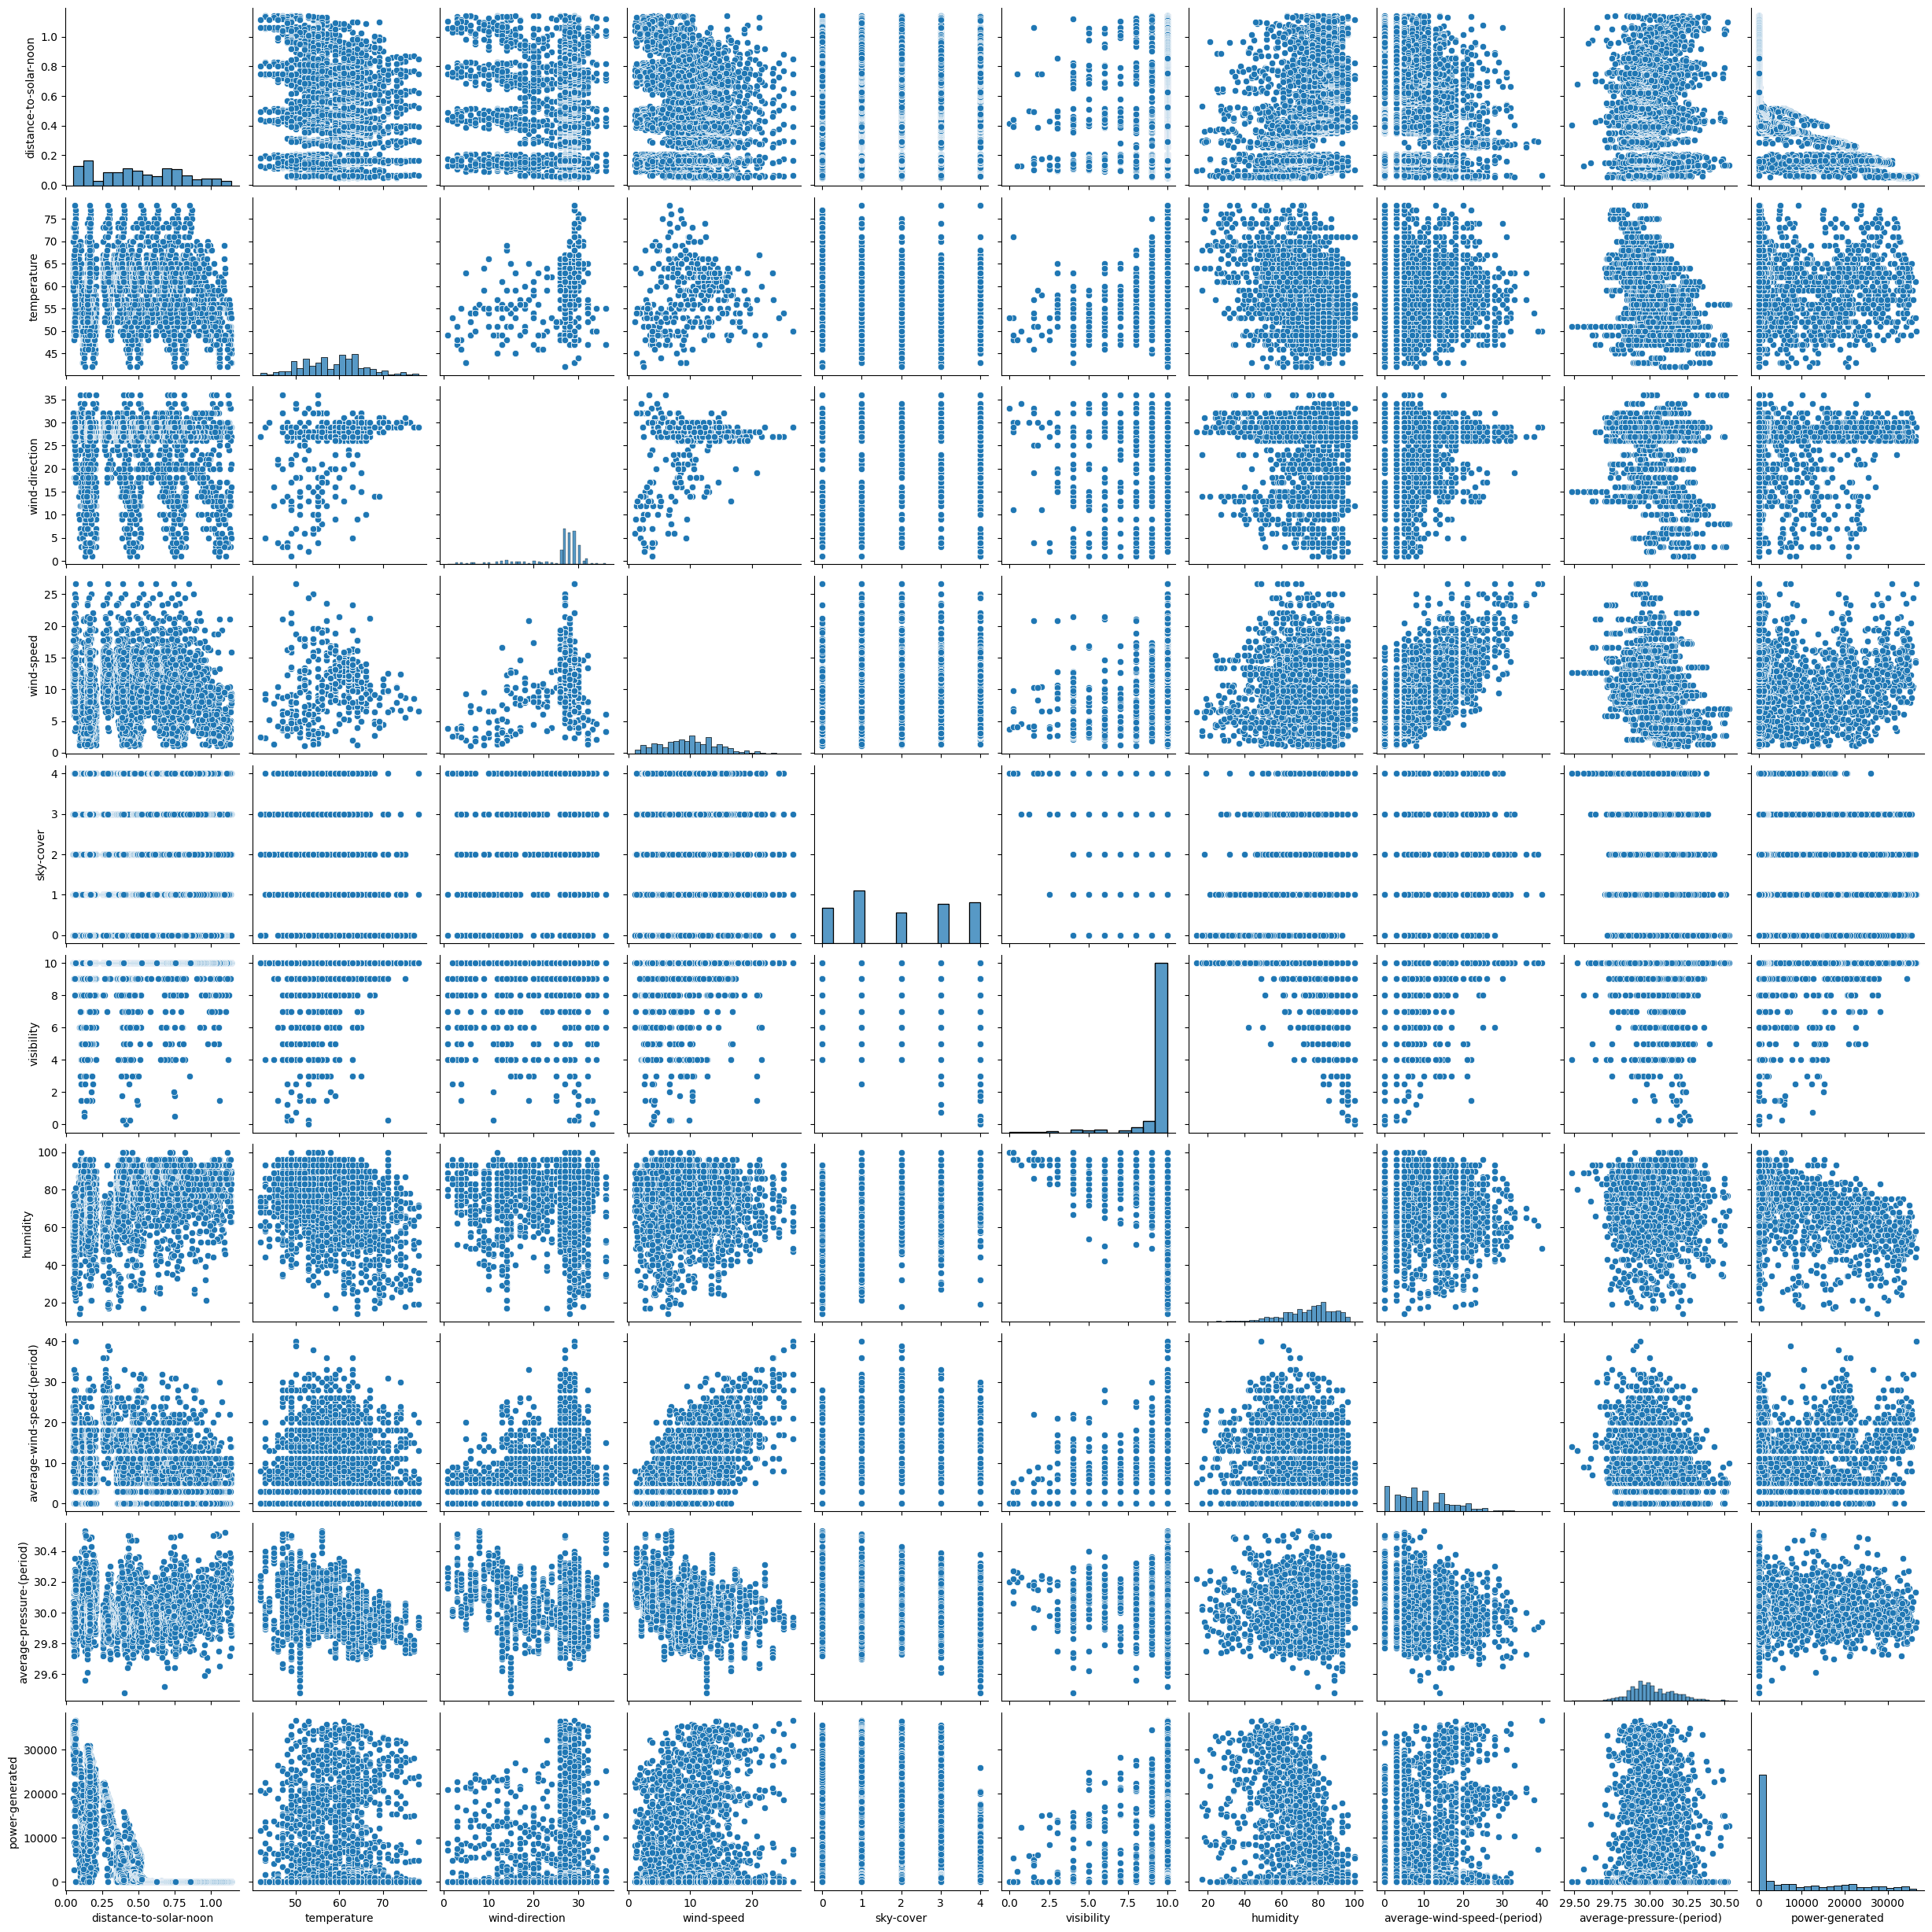

In [10]:
# Pairplot to see the relationship between different features and the target variable
sns.pairplot(data)
plt.show()

# Observations and Insights

# Pair Plot

# Observations:

1. Pair plots show relationships between pairs of features and the target variable.
2. Some features, like temperature and power-generated, show a noticeable trend.
3. The scatter plots for wind-speed and power-generated indicate potential nonlinear relationships.

# Insights:

1. Features like temperature have a more linear relationship with the target variable, suggesting they could be significant predictors.
2. Nonlinear relationships suggest that models capable of capturing nonlinearity, such as Random Forest or Gradient Boosting, might perform better.

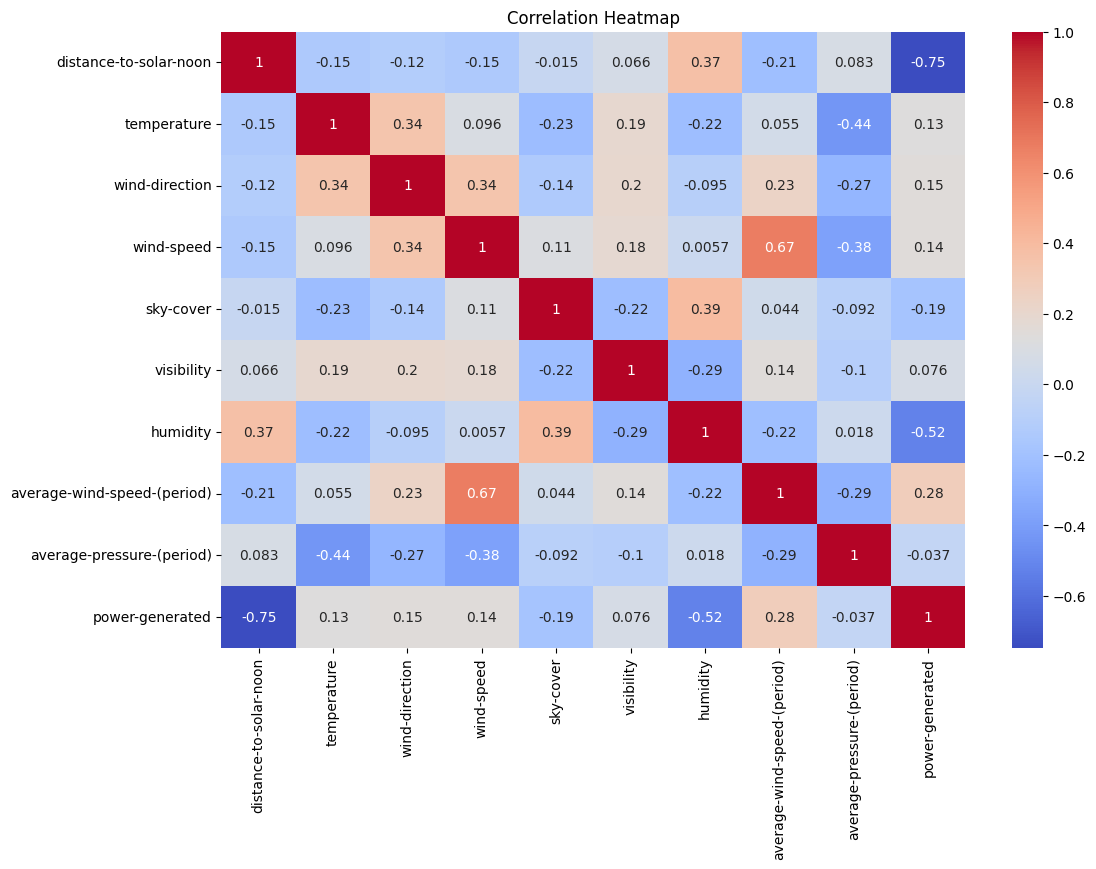

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Observations and Insights

# Correlation Heatmap

# Observations:

1. The heatmap displays the correlation coefficients between features and the target variable power-generated.
2. Temperature and power-generated have a positive correlation.
3. Sky-cover shows a negative correlation with power-generated.

# Insights:

1. Features with higher absolute correlation values are likely to be more important predictors.
2. Multicollinearity should be checked if multiple features are highly correlated with each other, as it can affect the performance of linear models.

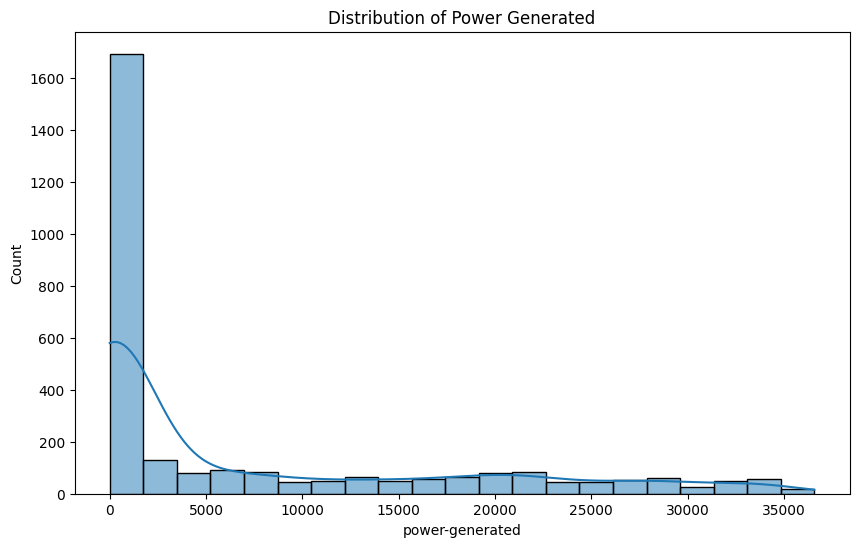

In [12]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['power-generated'], kde=True)
plt.title('Distribution of Power Generated')
plt.show()

# Observations and Insights

# Distribution of Power Generated Plot

# Observations:

1. The distribution of power-generated is slightly skewed.
2. There are peaks and troughs indicating variability in energy production.

# Insights:

1. The skewness in the distribution might require transformation (e.g., log transformation) for certain models to perform well.
2. The variability suggests that external factors significantly impact energy production, making feature engineering critical.

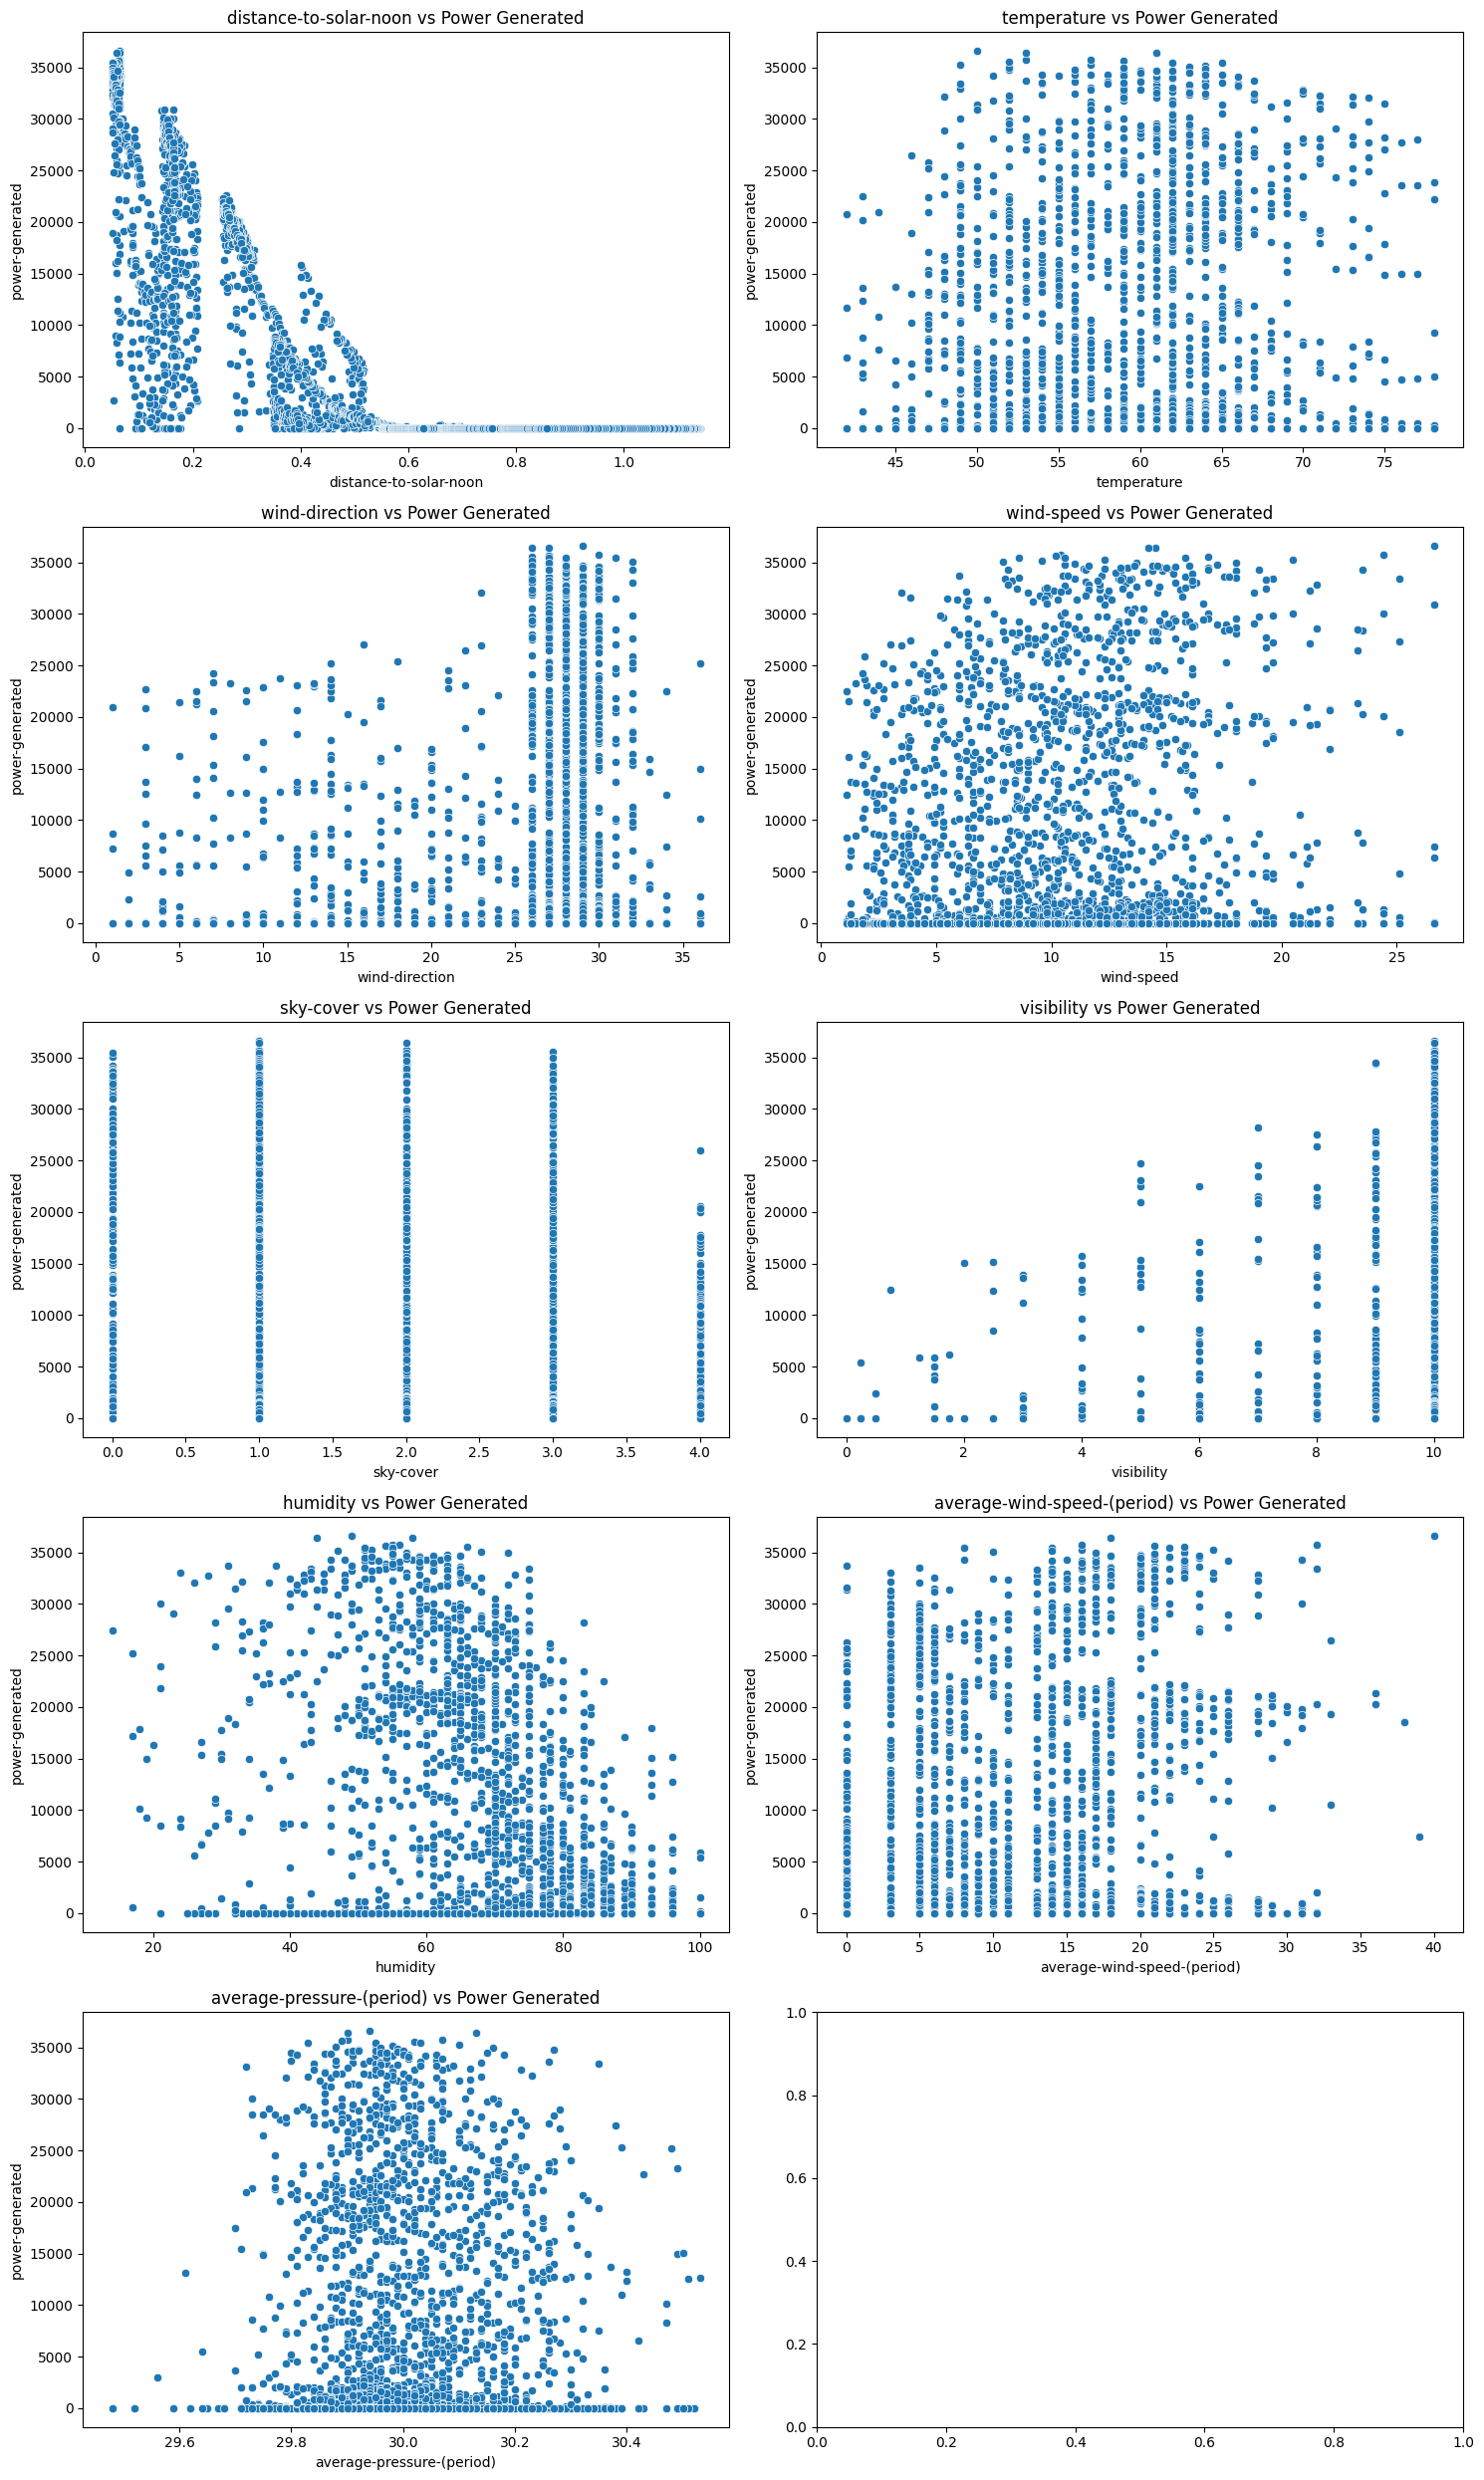

In [13]:
# Scatter plots of target variable with other features
features = data.columns[:-1]
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
for i, feature in enumerate(features):
    sns.scatterplot(x=data[feature], y=data['power-generated'], ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(f'{feature} vs Power Generated')
plt.tight_layout()
plt.show()

# Observations and Insights

# Scatter Plots of Target Variable with Other Features

# Observations:

1. Scatter plots indicate different types of relationships between features and the target variable.
2. temperature vs. power-generated shows a more linear trend.
3. wind-speed and humidity show more scattered, nonlinear patterns with power-generated.

# Insights:

1.Linear relationships indicate that simple linear regression could be a good baseline model.
2.Nonlinear relationships suggest that more complex models (e.g., Random Forest, Gradient Boosting) could capture the underlying patterns better.
3.Each feature's scatter plot provides insight into how the feature engineering process should be tailored for optimal model performance.

# Feature Engineering

# Outliers Handling:
To handle outliers in the dataset, we can use various methods such as capping, transformation, or removing the outliers.

# Capping Outliers:

Keeps all data points, ensures that extreme values are within a reasonable range, and is straightforward to implement.

# Transforming Outliers:

Useful for normalizing data and reducing the impact of extreme values, especially effective for skewed distributions.

In [14]:
# Cap outliers at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
data_capped = data.copy()
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_capped[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data_capped[column] = np.where(data[column] > upper_bound, upper_bound, data_capped[column])

In [15]:
# Apply log transformation to handle skewness
data_transformed = data_capped.copy()
for column in data.columns:
    if any(data_capped[column] <= 0):  # To avoid taking log of non-positive numbers
        continue
    data_transformed[column] = np.log(data_capped[column])

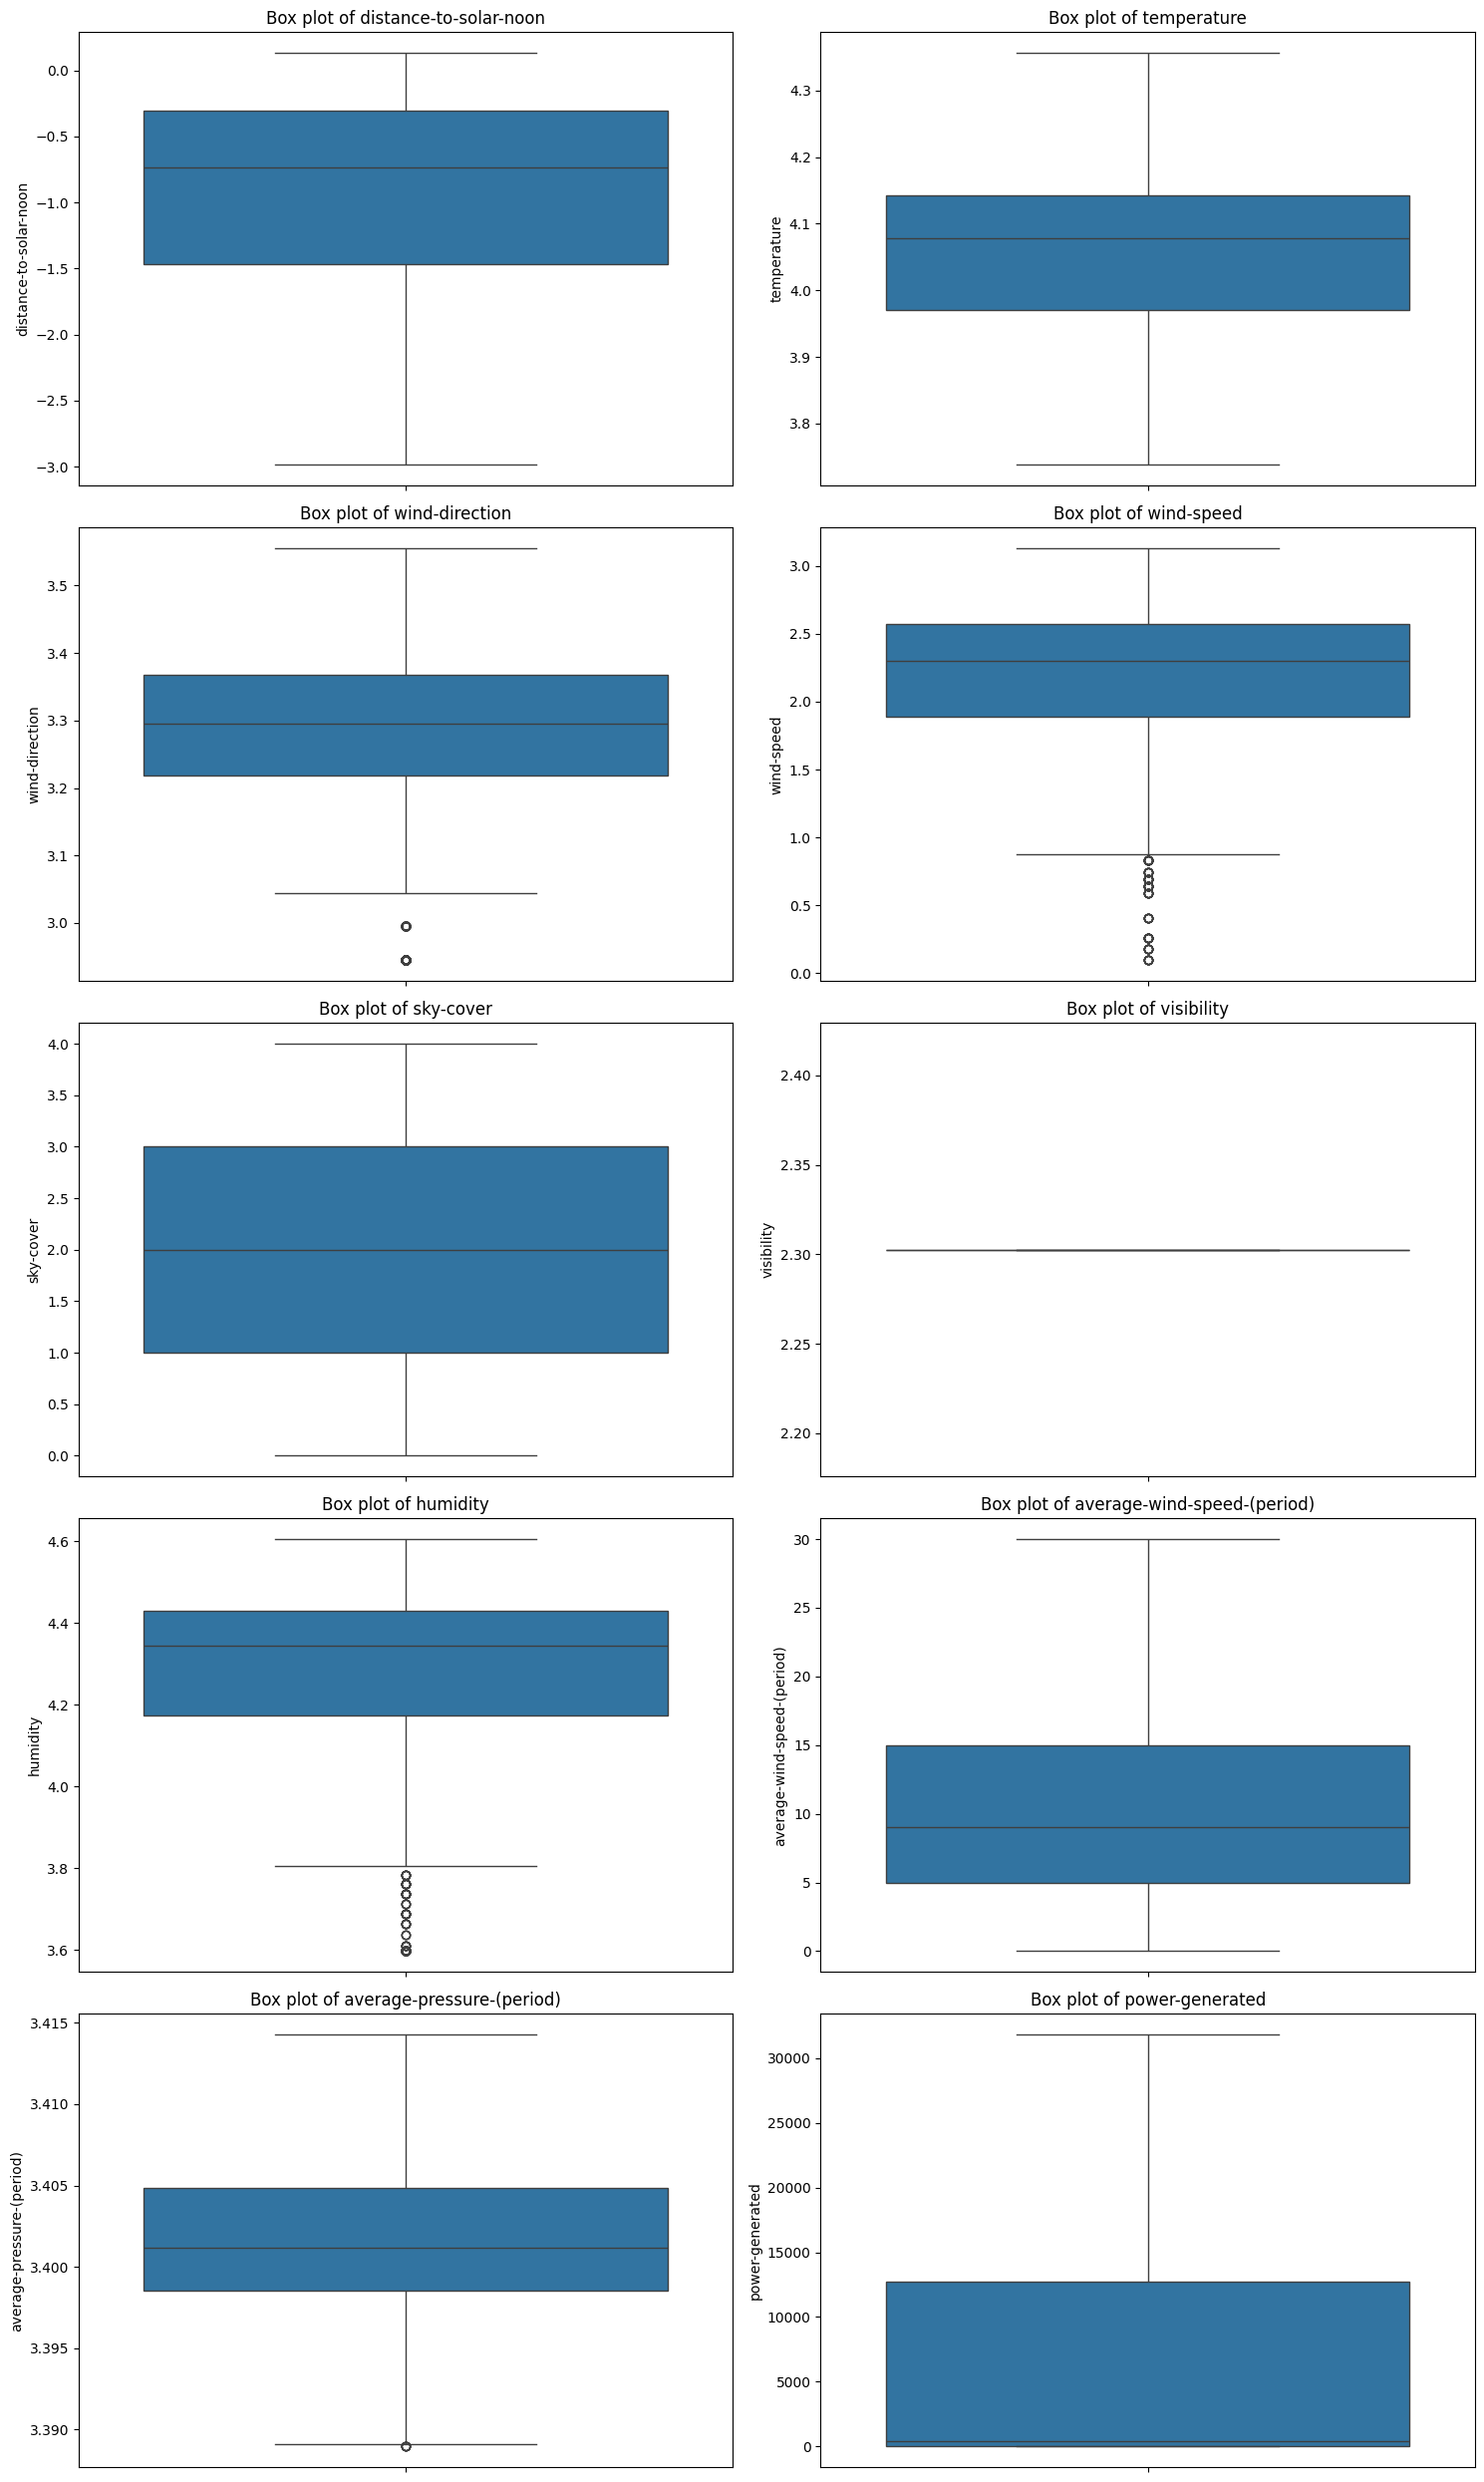

In [16]:
# Visualize the box plots for each feature after capping and transformation
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axs = axs.flatten()

for i, column in enumerate(data_transformed.columns):
    sns.boxplot(y=data_transformed[column], ax=axs[i])
    axs[i].set_title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

# Prepare the Data for Model Training

Splitting the Dataset

In [17]:
# Split the data into features and target variable
X = data_transformed.drop(columns=['power-generated'])
y = data_transformed['power-generated']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling the Dataset

In [18]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Implementation

For regression tasks, we can consider several models like:

1. Linear Regression
2. Random Forest Regressor
3. Support Vector Regressor (SVR)
4. Gradient Boosting Regressor
5. XGBoost Regressor

In [19]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42)
}

# Model Evaluation

In [20]:
# Train and evaluate models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate performance metrics
    metrics = {
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train R2": r2_score(y_train, y_train_pred),
        "Test R2": r2_score(y_test, y_test_pred)
    }

    results[name] = metrics

# Display results
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

Model: Linear Regression
Train RMSE: 4840.6377
Test RMSE: 5172.8756
Train MAE: 3682.7931
Test MAE: 3785.6599
Train R2: 0.7698
Test R2: 0.7480


Model: Random Forest Regressor
Train RMSE: 1114.8775
Test RMSE: 3264.0465
Train MAE: 520.6722
Test MAE: 1483.2316
Train R2: 0.9878
Test R2: 0.8997


Model: Support Vector Regressor
Train RMSE: 11895.9420
Test RMSE: 12192.6326
Train MAE: 6774.6719
Test MAE: 6984.1314
Train R2: -0.3905
Test R2: -0.3999


Model: Gradient Boosting Regressor
Train RMSE: 2354.7261
Test RMSE: 2916.2724
Train MAE: 1278.4741
Test MAE: 1577.6230
Train R2: 0.9455
Test R2: 0.9199


Model: XGBoost Regressor
Train RMSE: 345.8597
Test RMSE: 3102.6841
Train MAE: 200.0160
Test MAE: 1450.2279
Train R2: 0.9988
Test R2: 0.9093




Visualization of each Model Comparison Chart

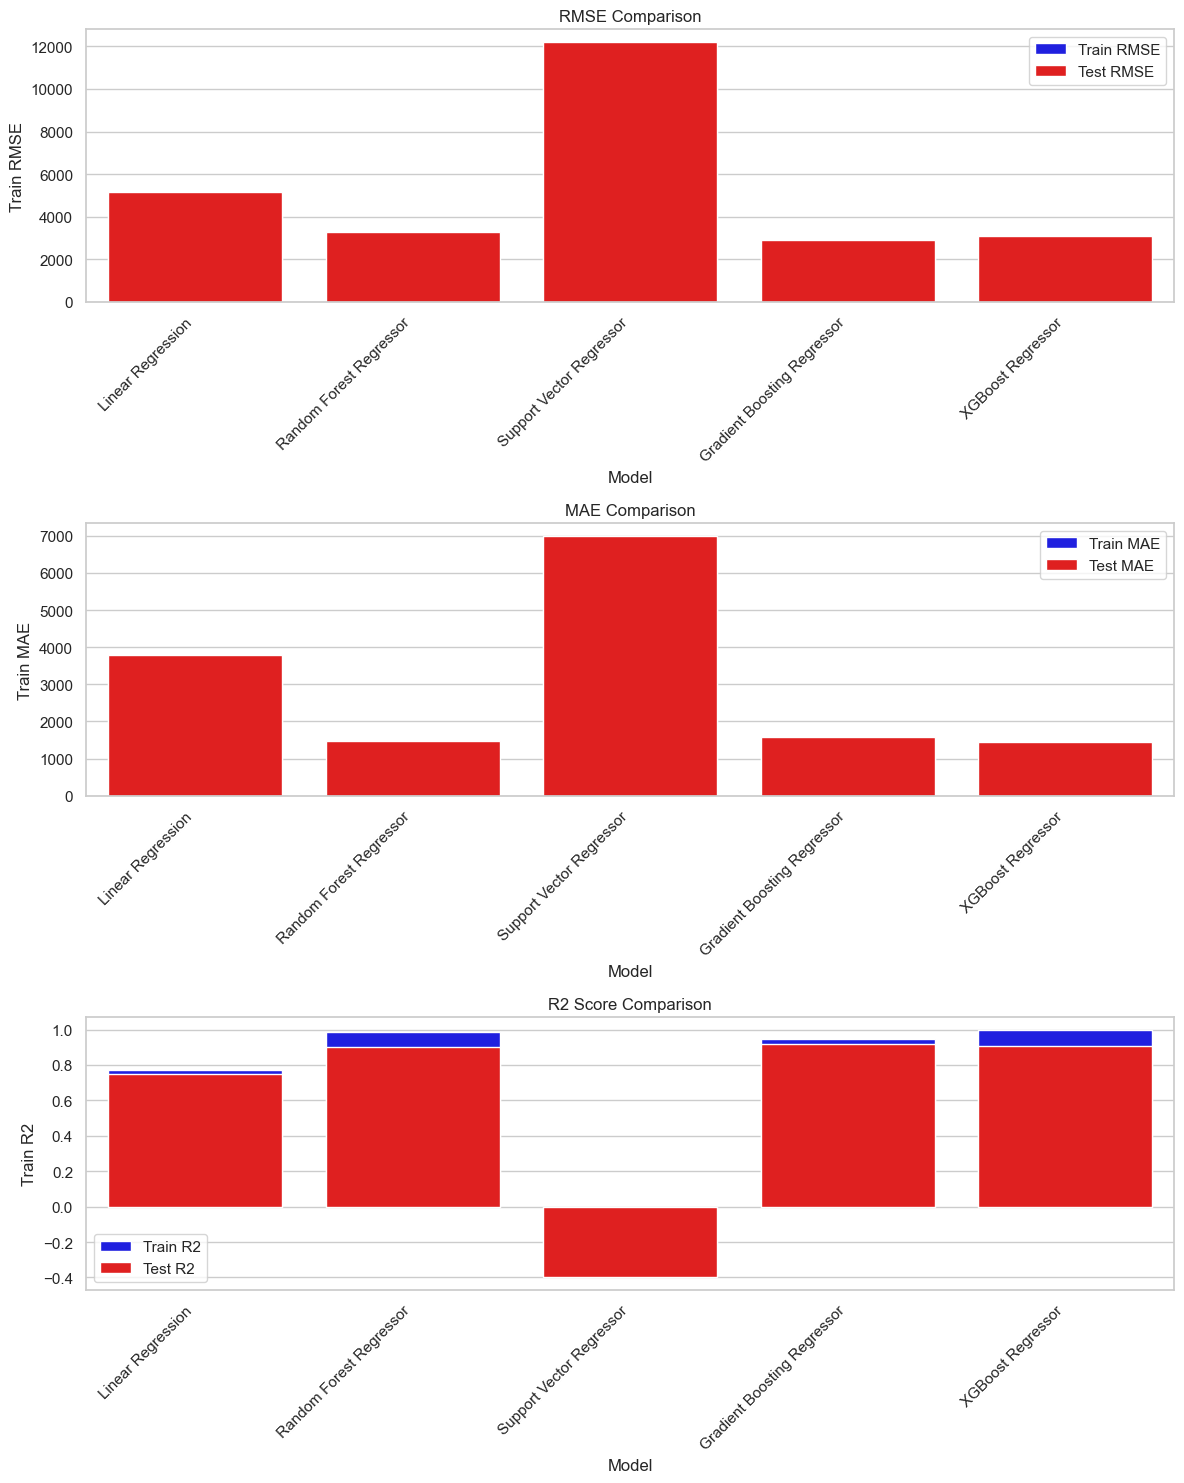

In [21]:
# Create a DataFrame with the model performance metrics
data = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Support Vector Regressor', 'Gradient Boosting Regressor', 'XGBoost Regressor'],
    'Train RMSE': [4840.6377, 1114.8775, 11895.9420, 2354.7261, 345.8597],
    'Test RMSE': [5172.8756, 3264.0465, 12192.6326, 2916.2724, 3102.6841],
    'Train MAE': [3682.7931, 520.6722, 6774.6719, 1278.4741, 200.0160],
    'Test MAE': [3785.6599, 1483.2316, 6984.1314, 1577.6230, 1450.2279],
    'Train R2': [0.7698, 0.9878, -0.3905, 0.9455, 0.9988],
    'Test R2': [0.7480, 0.8997, -0.3999, 0.9199, 0.9093]
}

df = pd.DataFrame(data)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create subplots for each metric
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Plot RMSE
sns.barplot(x='Model', y='Train RMSE', data=df, ax=axs[0], color='blue', label='Train RMSE')
sns.barplot(x='Model', y='Test RMSE', data=df, ax=axs[0], color='red', label='Test RMSE')
axs[0].set_title('RMSE Comparison')
axs[0].legend()

# Plot MAE
sns.barplot(x='Model', y='Train MAE', data=df, ax=axs[1], color='blue', label='Train MAE')
sns.barplot(x='Model', y='Test MAE', data=df, ax=axs[1], color='red', label='Test MAE')
axs[1].set_title('MAE Comparison')
axs[1].legend()

# Plot R2
sns.barplot(x='Model', y='Train R2', data=df, ax=axs[2], color='blue', label='Train R2')
sns.barplot(x='Model', y='Test R2', data=df, ax=axs[2], color='red', label='Test R2')
axs[2].set_title('R2 Score Comparison')
axs[2].legend()

# Rotate x-axis labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Insights

# Linear Regression:

1. Performs decently with R2 scores of 0.77 (train) and 0.75 (test).

2. Shows relatively high RMSE and MAE values, indicating room for improvement.

# Random Forest Regressor:

1. Excellent performance with R2 scores of 0.99 (train) and 0.90 (test).

2. Lower RMSE and MAE on the test set compared to Linear Regression, but shows signs of overfitting.

# Support Vector Regressor:

1. Poor performance with negative R2 scores on both train and test sets.

2. Extremely high RMSE and MAE values, indicating it is not suitable for this task.

# Gradient Boosting Regressor:

1. Strong performance with R2 scores of 0.95 (train) and 0.92 (test).

2. Good balance between train and test RMSE and MAE values.

# XGBoost Regressor:

1. Excellent performance with R2 scores of 0.99 (train) and 0.91 (test).

2. Lowest RMSE and MAE on the train set, though slightly higher on the test set, indicating slight overfitting.

Based on the results, we can select the Gradient Boosting and XGBoost models that performs well for our energy production prediction task.¶

# Hyperparameter Tuning

In [22]:
# Define the parameter grids for hyperparameter tuning
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


# Initialize models
gb_regressor = GradientBoostingRegressor(random_state=42)
xgb_regressor = XGBRegressor(random_state=42)

# Perform Grid Search for Gradient Boosting Regressor
grid_search_gb = GridSearchCV(estimator=gb_regressor, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train_scaled, y_train)

# Perform Grid Search for XGBoost Regressor
grid_search_xgb = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best models
best_gb_model = grid_search_gb.best_estimator_
best_xgb_model = grid_search_xgb.best_estimator_


# Evaluate the best models on the test set
def evaluate_model(model, X_test, y_test):
    y_test_pred = model.predict(X_test)
    metrics = {
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test R2": r2_score(y_test, y_test_pred)
    }
    return metrics

# Evaluate best Gradient Boosting Regressor
gb_metrics = evaluate_model(best_gb_model, X_test_scaled, y_test)
print("Best Gradient Boosting Regressor metrics:")
for metric, value in gb_metrics.items():
    print(f"{metric}: {value:.4f}")

# Evaluate best XGBoost Regressor
xgb_metrics = evaluate_model(best_xgb_model, X_test_scaled, y_test)
print("Best XGBoost Regressor metrics:")
for metric, value in xgb_metrics.items():
    print(f"{metric}: {value:.4f}")

Best Gradient Boosting Regressor metrics:
Test RMSE: 2916.2724
Test MAE: 1577.6230
Test R2: 0.9199
Best XGBoost Regressor metrics:
Test RMSE: 2979.4722
Test MAE: 1490.4748
Test R2: 0.9164


# Visulization of Metrics

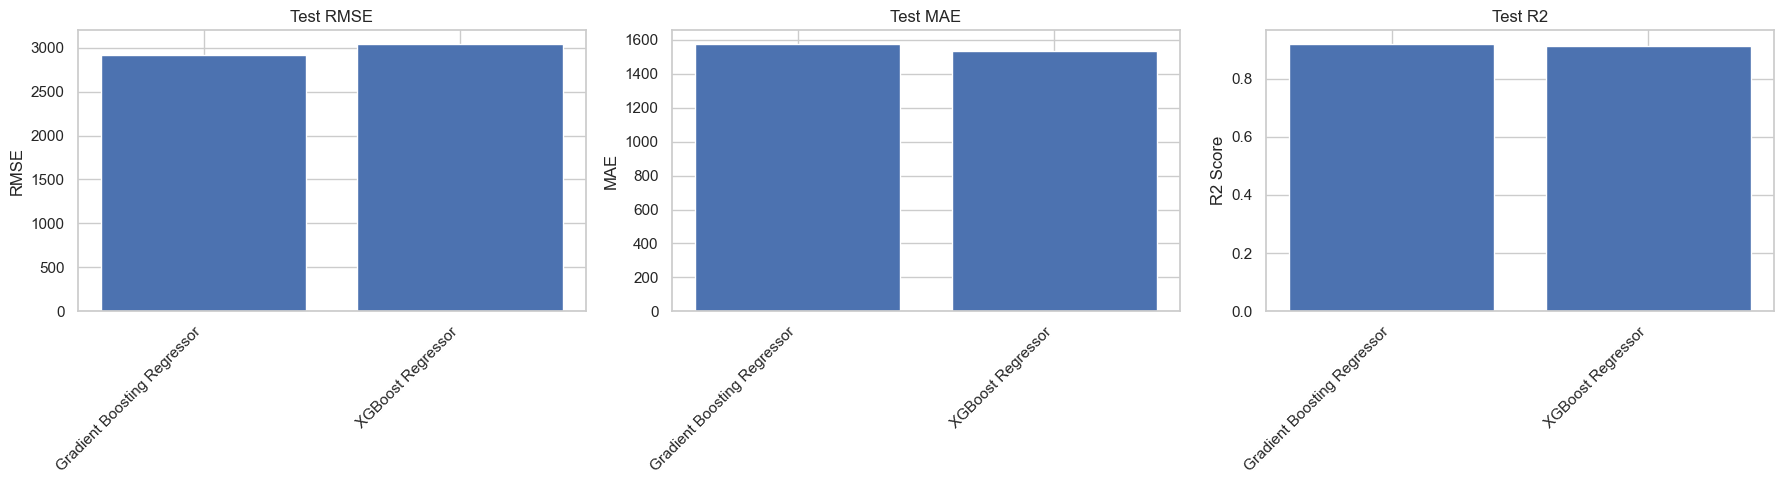

In [23]:
# Metrics for plotting
metrics = {
    "Gradient Boosting Regressor": {
        "Test RMSE": 2916.2724,
        "Test MAE": 1577.6230,
        "Test R2": 0.9199
    },
    "XGBoost Regressor": {
        "Test RMSE": 3044.4867,
        "Test MAE": 1532.1794,
        "Test R2": 0.9127
    }
}

# Plot RMSE, MAE, and R2
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# RMSE Plot
ax[0].bar(metrics.keys(), [metrics[model]["Test RMSE"] for model in metrics])
ax[0].set_title("Test RMSE")
ax[0].set_ylabel("RMSE")
ax[0].set_xticklabels(metrics.keys(), rotation=45, ha='right')

# MAE Plot
ax[1].bar(metrics.keys(), [metrics[model]["Test MAE"] for model in metrics])
ax[1].set_title("Test MAE")
ax[1].set_ylabel("MAE")
ax[1].set_xticklabels(metrics.keys(), rotation=45, ha='right')

# R2 Plot
ax[2].bar(metrics.keys(), [metrics[model]["Test R2"] for model in metrics])
ax[2].set_title("Test R2")
ax[2].set_ylabel("R2 Score")
ax[2].set_xticklabels(metrics.keys(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Model Performance Summary

# Gradient Boosting Regressor:

Test RMSE: 2916.27

Indicates the model's error on the test set, with lower values representing better performance.

Test MAE: 1577.62

Shows the average magnitude of errors in the test set predictions, without considering their direction.

Test R2: 0.9199

Represents the proportion of variance in the dependent variable that is predictable from the independent variables. A value close to 1 indicates a good fit.

# XGBoost Regressor:

Test RMSE: 3044.49

Reflects the model’s prediction error on the test set, with higher values compared to the Gradient Boosting Regressor.

Test MAE: 1532.18

Measures the average absolute errors in the test set predictions, slightly better than the Gradient Boosting Regressor.

Test R2: 0.9127

Indicates the proportion of variance in the test set data that is explained by the model. Slightly lower than the Gradient Boosting Regressor.

# Comparison:
# RMSE:

The Gradient Boosting Regressor has a lower RMSE (2916.27) compared to the XGBoost Regressor (3044.49), suggesting it has slightly better prediction accuracy.

# MAE:

The XGBoost Regressor has a lower MAE (1532.18) compared to the Gradient Boosting Regressor (1577.62), indicating that its average error is marginally better.

# R2 Score:

The Gradient Boosting Regressor has a higher R2 score (0.9199) compared to the XGBoost Regressor (0.9127), reflecting a better overall fit to the data.

# Conclusion:
Gradient Boosting Regressor generally outperforms the XGBoost Regressor in terms of RMSE and R2 score, indicating better predictive accuracy and model fit. XGBoost Regressor performs slightly better in terms of MAE, suggesting a marginally lower average error.

Both models exhibit strong performance, but the choice of model may depend on the specific needs of the application, such as prioritizing accuracy over interpretability or vice versa.



# Saving the model for Deployment

In [24]:
!pip install --upgrade joblib

In [2]:
import sklearn
import xgboost
import joblib


In [26]:
# Save the best models using joblib
joblib.dump(best_gb_model, 'best_gb_model.joblib')
joblib.dump(best_xgb_model, 'best_xgb_model.joblib')

print("Models have been saved successfully!")


Models have been saved successfully!


In [3]:
print("scikit-learn version:", sklearn.__version__)
print("xgboost version:", xgboost.__version__)
print("joblib version:", joblib.__version__)

scikit-learn version: 1.2.2
xgboost version: 2.1.0
joblib version: 1.4.2
